In [125]:
import os
import pandas as pd
import numpy as np

In [126]:
df = pd.read_excel("UV6486-XLS-ENG.xlsx", sheet_name="Nils Baker data")
df = df.dropna()

In [148]:
df.head()

,ID,Total Households in Area,Households with Account,Inside/Outside Footprint
0,1,1772960.0,17563.0,Outside
1,2,1345209.0,14547.0,Outside
2,3,960434.0,10847.0,Outside
3,4,928274.0,18133.0,Inside
4,5,893995.0,5291.0,Outside


In [127]:
groupby_df = df.groupby(['Inside/Outside Footprint'])['Total Households in Area', 'Households with Account'].agg(['mean', 'sum'])
groupby_df

/var/folders/zv/bq3zr8t97_12jyw8m8jbgwyc0000gn/T/ipykernel_17281/2556932332.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  groupby_df = df.groupby(['Inside/Outside Footprint'])['Total Households in Area', 'Households with Account'].agg(['mean', 'sum'])


Total Households in Area              \
                                             mean         sum   
Inside/Outside Footprint                                        
Inside                               69434.150943   3680010.0   
Outside                             236303.149254  15832311.0   

                         Households with Account            
                                            mean       sum  
Inside/Outside Footprint                                    
Inside                               1189.603774   63049.0  
Outside                              2627.194030  176022.0

## Proportion Comparison with Bar Chart

In [128]:
sum_households = groupby_df[('Total Households in Area',  'sum')]
sum_households

Inside/Outside Footprint
Inside      3680010.0
Outside    15832311.0
Name: (Total Households in Area, sum), dtype: float64

In [129]:
sum_accounts = groupby_df[('Households with Account',  'sum')]
sum_accounts

Inside/Outside Footprint
Inside      63049.0
Outside    176022.0
Name: (Households with Account, sum), dtype: float64

In [149]:
sum_accounts/sum_households

Inside/Outside Footprint
Inside     0.017133
Outside    0.011118
dtype: float64

<AxesSubplot:xlabel='Inside/Outside Footprint'>

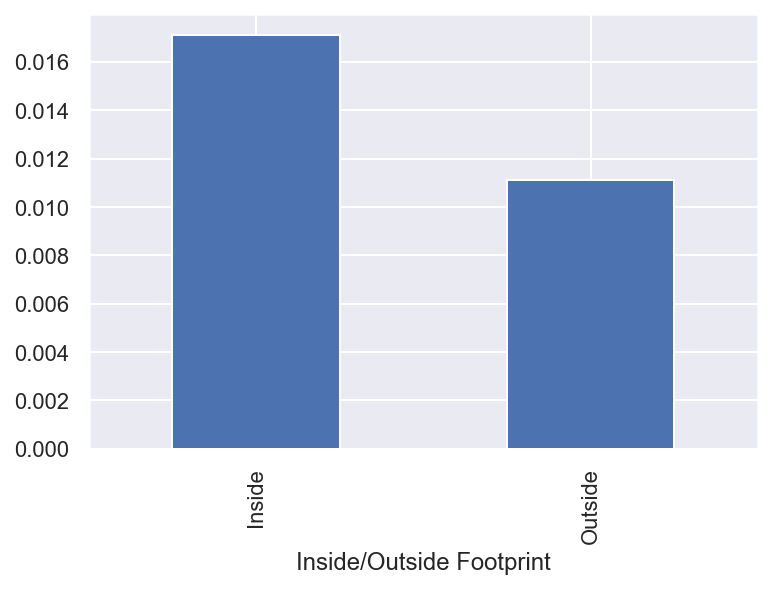

In [130]:
(sum_accounts/sum_households).plot(kind="bar")

## Linear Regression and Scatter Plot

In [132]:
temp_df = df.rename({'Total Households in Area': 'Total_Households', "Households with Account": "Accounts", "Inside/Outside Footprint": "Footprint"}, axis=1)


<AxesSubplot:xlabel='Total_Households', ylabel='Accounts'>

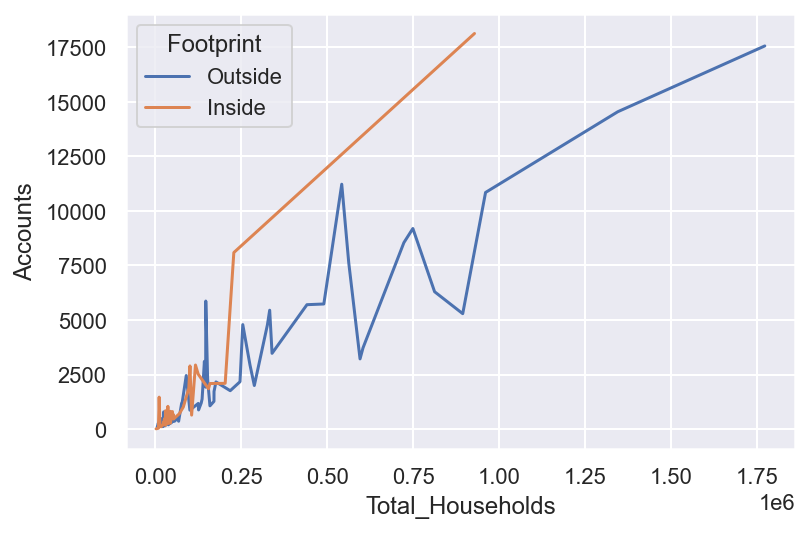

In [133]:
import seaborn as sns

sns.lineplot( x=temp_df["Total_Households"],y=temp_df["Accounts"],hue=temp_df["Footprint"])

In [134]:
from sklearn.linear_model import LinearRegression

In [135]:
hi = 34
linear_regressor="bye"
linear_regressor+str(hi)

'bye34'

Inside
Outside


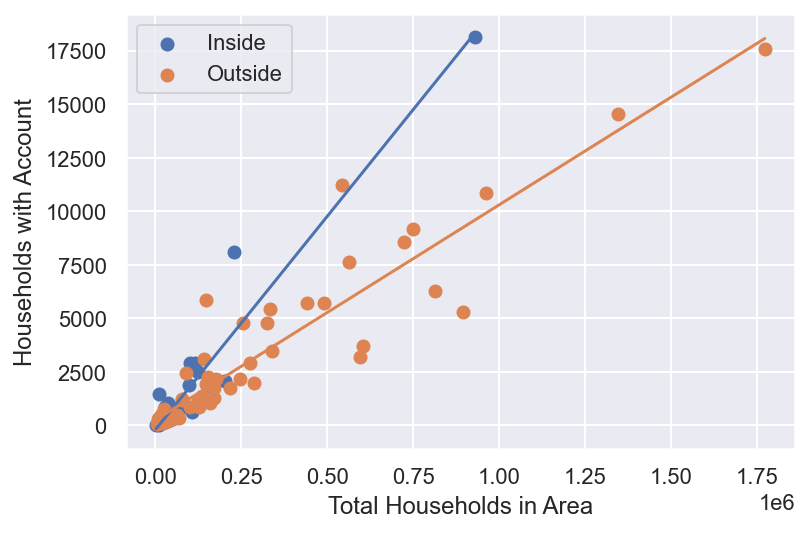

In [136]:
fig, ax = plt.subplots()

plt.xlabel("Total Households in Area")
plt.ylabel("Households with Account")
colors = {"Inside": "Blue", "Outside": "Red"}

scatter_x = df['Total Households in Area'].to_numpy()
scatter_y = df['Households with Account'].to_numpy()
group = df["Inside/Outside Footprint"].to_numpy()

for g in np.unique(group):
    i = np.where(group == g)
    print(str(g))
    linear_regressor = LinearRegression()
    X  = scatter_x[i]
    Y = scatter_y[i]
    linear_regressor.fit(X.reshape(-1, 1), Y.reshape(-1, 1))
    Y_pred = linear_regressor.predict(X.reshape(-1, 1))
    ax.scatter(X, Y, label=g)
    plt.plot(X, Y_pred)
ax.legend()
plt.show()

In [138]:
from statsmodels.formula.api import ols

group = temp_df["Inside/Outside Footprint"].to_numpy()

for g in np.unique(group):
    i = np.where(group == g)
    print(g, "Regression Result")
    print(ols('Total_Households ~ Accounts', data = temp_df.iloc[i]).fit().summary())
    print("\n\n\n")


Inside Regression Result
                            OLS Regression Results                            
Dep. Variable:       Total_Households   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     655.6
Date:                Sun, 16 Jan 2022   Prob (F-statistic):           8.94e-31
Time:                        16:44:47   Log-Likelihood:                -628.78
No. Observations:                  53   AIC:                             1262.
Df Residuals:                      51   BIC:                             1265.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.406e+04   527

## Hypothesis Testing

In [139]:
temp_df

,ID,Total_Households,Accounts,Inside/Outside Footprint
0,1,1772960.0,17563.0,Outside
1,2,1345209.0,14547.0,Outside
2,3,960434.0,10847.0,Outside
3,4,928274.0,18133.0,Inside
4,5,893995.0,5291.0,Outside
...,...,...,...,...
115,116,9025.0,338.0,Inside
116,117,8843.0,42.0,Inside
117,118,8480.0,284.0,Outside
118,119,5019.0,87.0,Outside


In [140]:
import numpy as np
import pandas as pd
import scipy.stats.distributions as dist

In [142]:
temp_df["Proportion"] = temp_df["Accounts"]/temp_df["Total_Households"]
temp_df.head()

,ID,Total_Households,Accounts,Inside/Outside Footprint,Proportion
0,1,1772960.0,17563.0,Outside,0.009906
1,2,1345209.0,14547.0,Outside,0.010814
2,3,960434.0,10847.0,Outside,0.011294
3,4,928274.0,18133.0,Inside,0.019534
4,5,893995.0,5291.0,Outside,0.005918


In [143]:
groupby_df = df.groupby(['Inside/Outside Footprint'])['Total Households in Area', 'Households with Account'].agg(['mean', 'sum'])
groupby_df

/var/folders/zv/bq3zr8t97_12jyw8m8jbgwyc0000gn/T/ipykernel_17281/2556932332.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  groupby_df = df.groupby(['Inside/Outside Footprint'])['Total Households in Area', 'Households with Account'].agg(['mean', 'sum'])


Total Households in Area              \
                                             mean         sum   
Inside/Outside Footprint                                        
Inside                               69434.150943   3680010.0   
Outside                             236303.149254  15832311.0   

                         Households with Account            
                                            mean       sum  
Inside/Outside Footprint                                    
Inside                               1189.603774   63049.0  
Outside                              2627.194030  176022.0

[Proportion Test ](https://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportions_ztest.html)

The null hypothesis (H0) for the test is that the proportions are the same.<br>
The alternate hypothesis (H1) is that the proportions are not the same.

In [147]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

# can we assume anything from our sample
significance = 0.025
# note - the samples do not need to be the same size
sample_accounts_inside, sample_accounts_outside = (63049, 176022)
sample_households_inside, sample_households_outside = (3680010, 15832311)
# check our sample against Ho for Ha != Ho
accounts = np.array([sample_accounts_inside, sample_accounts_outside])
households = np.array([sample_households_inside, sample_households_outside])
# note, no need for a Ho value here - it's derived from the other parameters
stat, p_value = proportions_ztest(count=accounts, nobs=households,  alternative='two-sided')
# report
print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))
if p_value > significance:
   print ("Fail to reject the null hypothesis - we have nothing else to say")
else:
   print ("Reject the null hypothesis - suggest the alternative hypothesis is true")

z_stat: 94.480, p_value: 0.000
Reject the null hypothesis - suggest the alternative hypothesis is true
